In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' 

### Read file
- raw data name : "건축물연령공간정보" - 부산광역시 중구
- raw data source : The National Spatial Information Portal (http://openapi.nsdi.go.kr/nsdi/index.do)

In [2]:
df = pd.read_csv('./data/국가공간정보포털_건축물연령정보_부산중구.csv',
                sep='\t', encoding='utf-8')

### Check basic information
- It can be seen that the minimum value of columns such as ‘건물연면적’ and ‘건물높이’ is 0,  
  indicating the existence of outliers.
- For columns with outliers,  
  the data distribution needs to be examined more closely through visualization.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   법정동명      6536 non-null   object 
 1   건물연면적     6536 non-null   float64
 2   건축물구조명    6534 non-null   object 
 3   주요용도명     6535 non-null   object 
 4   건물높이      6533 non-null   float64
 5   지상층수      6536 non-null   int64  
 6   지하층수      6518 non-null   float64
 7   건물연령      4448 non-null   float64
 8   geometry  6536 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 459.7+ KB


In [4]:
df.describe()

,건물연면적,건물높이,지상층수,지하층수,건물연령
count,6536.000000,6533.000000,6536.000000,6518.000000,4448.000000
mean,589.936258,5.753874,3.358170,0.331697,33.597572
std,1902.859245,9.658369,2.290211,0.565065,13.174698
min,0.000000,0.000000,0.000000,0.000000,2.000000
25%,83.865000,0.000000,2.000000,0.000000,26.000000
50%,179.275000,0.000000,3.000000,0.000000,34.000000
75%,453.370000,11.350000,4.000000,1.000000,45.000000
max,40348.180000,115.880000,33.000000,7.000000,88.000000


In [5]:
df.describe(include='O')

,법정동명,건축물구조명,주요용도명,geometry
count,6536,6534,6535,6536
unique,40,13,25,6535
top,부산광역시 중구 영주동,철근콘크리트구조,단독주택,"POLYGON ((385690.3794 179835.9097, 385692.6131..."
freq,1339,3462,2928,2


### Examine data distribution with visualizations

#### 1. 건물연면적

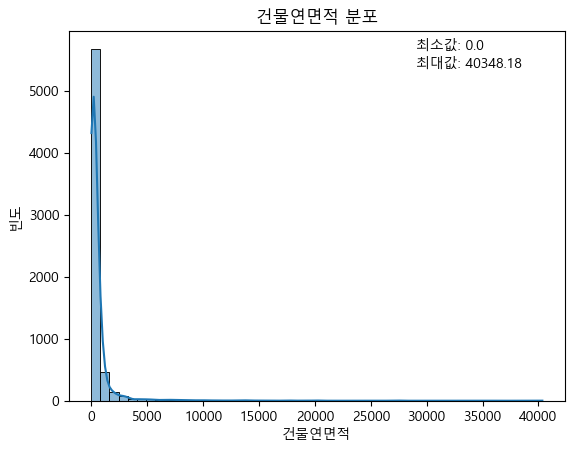

In [6]:
# 데이터 분포 확인(이상치 포함)

sns.histplot(df['건물연면적'], bins=50, kde=True)

min = df['건물연면적'].min()
max = df['건물연면적'].max()
plt.annotate(f'최소값: {min}', xy=(0.7, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(f'최대값: {max}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

plt.title('건물연면적 분포')
plt.xlabel('건물연면적')
plt.ylabel('빈도')
plt.show()

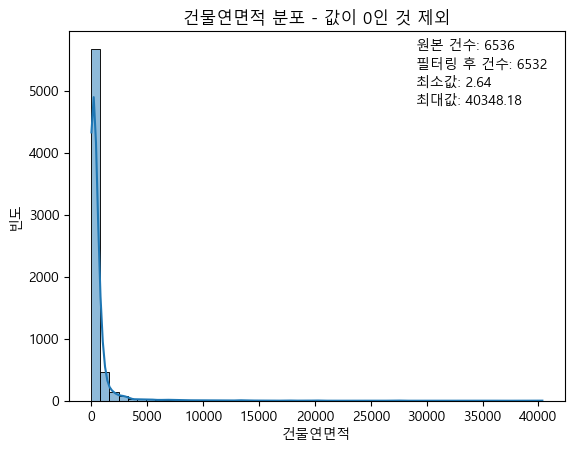

In [7]:
# 값이 0인 이상치를 필터링한 후 데이터 분포 확인

# 조건에 따라 데이터 필터링
filtered_df = df[df['건물연면적'] != 0]

sns.histplot(filtered_df['건물연면적'], bins=50, kde=True)

total_count = len(df)
filtered_count = len(filtered_df)
plt.annotate(f'원본 건수: {total_count}', xy=(0.7, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(f'필터링 후 건수: {filtered_count}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

min = filtered_df['건물연면적'].min()
max = filtered_df['건물연면적'].max()
plt.annotate(f'최소값: {min}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=10)
plt.annotate(f'최대값: {max}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)

plt.title('건물연면적 분포 - 값이 0인 것 제외')
plt.xlabel('건물연면적')
plt.ylabel('빈도')

plt.show()

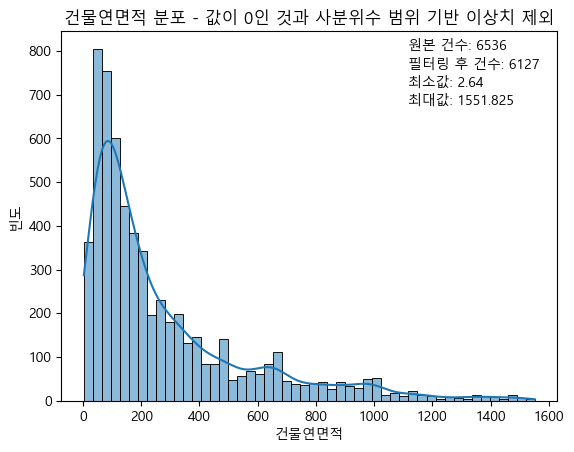

In [8]:
# 이상치를 필터링 조건 추가
# 이상치 범위는 사분위수 범위를 기반으로 설정

# IQR 계산
Q1 = df['건물연면적'].quantile(0.25)
Q3 = df['건물연면적'].quantile(0.75)
IQR = Q3 - Q1

# 하한과 상한 계산
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# 조건에 따라 데이터 필터링
filtered_df = df[(df['건물연면적'] >= lower_bound) & 
                 (df['건물연면적'] <= upper_bound) & 
                 (df['건물연면적'] != 0)]

sns.histplot(filtered_df['건물연면적'], bins=50, kde=True)

total_count = len(df)
filtered_count = len(filtered_df)
plt.annotate(f'원본 건수: {total_count}', xy=(0.7, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(f'필터링 후 건수: {filtered_count}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

min = filtered_df['건물연면적'].min()
max = filtered_df['건물연면적'].max()
plt.annotate(f'최소값: {min}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=10)
plt.annotate(f'최대값: {max}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)

plt.title('건물연면적 분포 - 값이 0인 것과 사분위수 범위 기반 이상치 제외')
plt.xlabel('건물연면적')
plt.ylabel('빈도')

plt.show()

#### 2. 건물높이

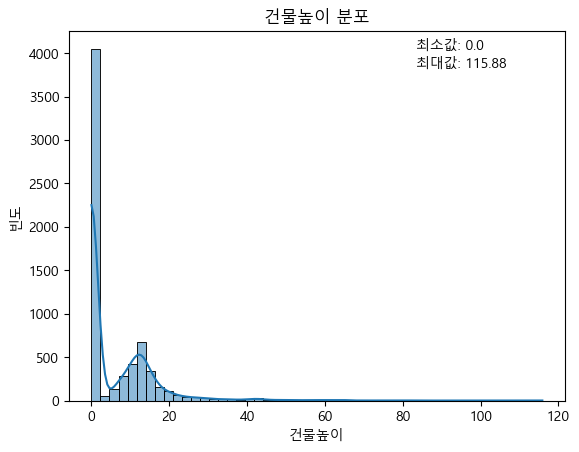

In [9]:
# 데이터 분포 확인(이상치 포함)

sns.histplot(df['건물높이'], bins=50, kde=True)

min = df['건물높이'].min()
max = df['건물높이'].max()

plt.annotate(f'최소값: {min}', xy=(0.7, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(f'최대값: {max}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

plt.title('건물높이 분포')
plt.xlabel('건물높이')
plt.ylabel('빈도')
plt.show()

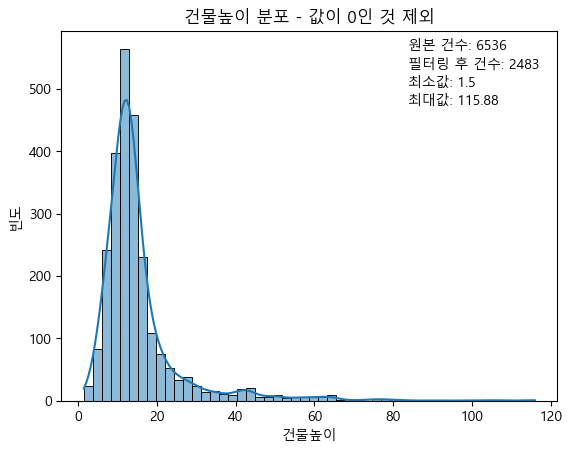

In [10]:
# 값이 0인 이상치를 필터링한 후 데이터 분포 확인

# 조건에 따라 데이터 필터링
filtered_df = df[df['건물높이'] != 0]

sns.histplot(filtered_df['건물높이'], bins=50, kde=True)

total_count = len(df)
filtered_count = len(filtered_df)
plt.annotate(f'원본 건수: {total_count}', xy=(0.7, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(f'필터링 후 건수: {filtered_count}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

min = filtered_df['건물높이'].min()
max = filtered_df['건물높이'].max()
plt.annotate(f'최소값: {min}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=10)
plt.annotate(f'최대값: {max}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)

plt.title('건물높이 분포 - 값이 0인 것 제외')
plt.xlabel('건물높이')
plt.ylabel('빈도')

plt.show()

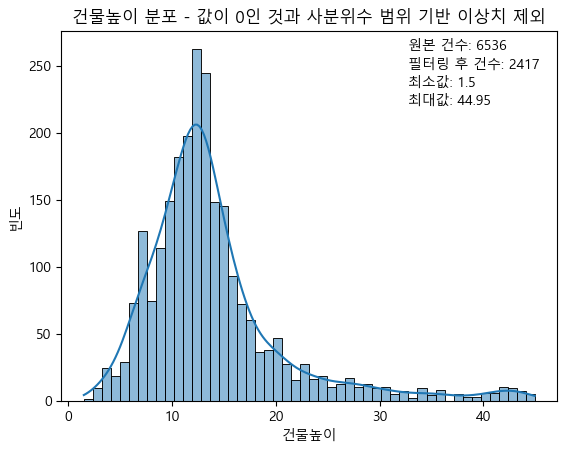

In [11]:
# 이상치를 필터링 조건 추가
# 이상치 범위는 사분위수 범위를 기반으로 설정

# IQR 계산
Q1 = df['건물높이'].quantile(0.25)
Q3 = df['건물높이'].quantile(0.75)
IQR = Q3 - Q1

# 하한과 상한 계산
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# 조건에 따라 데이터 필터링
filtered_df = df[(df['건물높이'] >= lower_bound) & 
                 (df['건물높이'] <= upper_bound) & 
                 (df['건물높이'] != 0)]

sns.histplot(filtered_df['건물높이'], bins=50, kde=True)

total_count = len(df)
filtered_count = len(filtered_df)
plt.annotate(f'원본 건수: {total_count}', xy=(0.7, 0.95), xycoords='axes fraction', fontsize=10)
plt.annotate(f'필터링 후 건수: {filtered_count}', xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)

min = filtered_df['건물높이'].min()
max = filtered_df['건물높이'].max()
plt.annotate(f'최소값: {min}', xy=(0.7, 0.85), xycoords='axes fraction', fontsize=10)
plt.annotate(f'최대값: {max}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=10)

plt.title('건물높이 분포 - 값이 0인 것과 사분위수 범위 기반 이상치 제외')
plt.xlabel('건물높이')
plt.ylabel('빈도')

plt.show()

#### 3. 지상층수

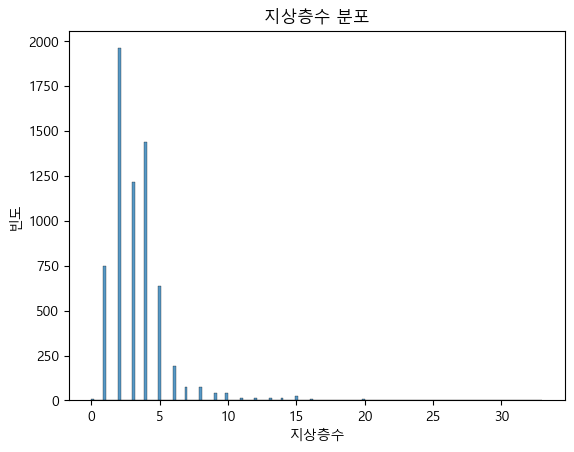

In [12]:
# 데이터 분포 확인

sns.histplot(df['지상층수'])
plt.title('지상층수 분포')
plt.xlabel('지상층수')
plt.ylabel('빈도')
plt.show()

#### 4. 지하층수

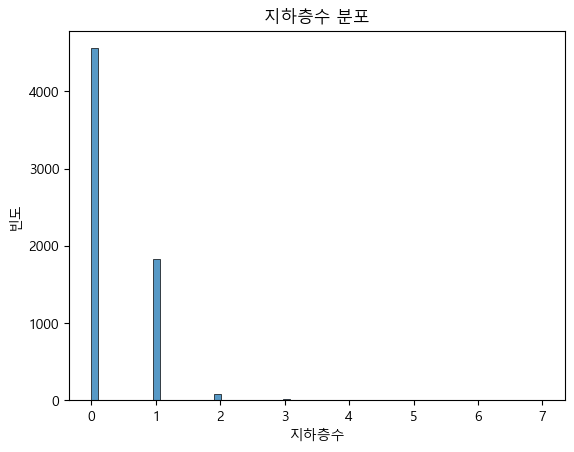

In [13]:
# 데이터 분포 확인

sns.histplot(df['지하층수'])
plt.title('지하층수 분포')
plt.xlabel('지하층수')
plt.ylabel('빈도')
plt.show()

#### 5. 건물연령

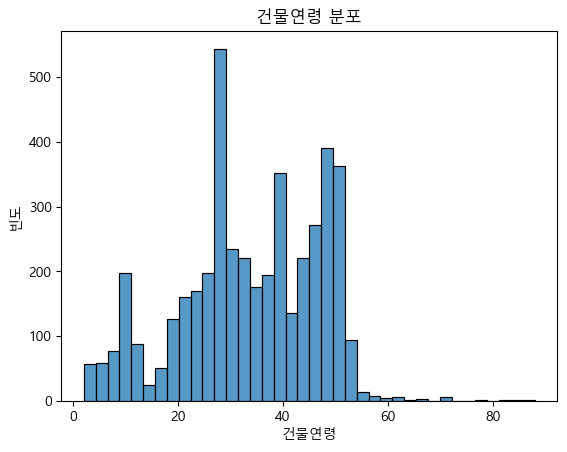

In [14]:
# 데이터 분포 확인

sns.histplot(df['건물연령'])
plt.title('건물연령 분포')
plt.xlabel('건물연령')
plt.ylabel('빈도')
plt.show()